## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_absolute_error as MAE,
                             make_scorer)

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from numpy.random import RandomState

In [ ]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_test_new = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_recovery_full_new = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [ ]:
display(gold_recovery_train.head(2))
display(gold_recovery_test_new.head(2))
display(gold_recovery_full_new.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [ ]:
gold_recovery_train.info()
gold_recovery_test_new.info() #тут 53 колонки, нет целевых
gold_recovery_full_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
display(gold_recovery_train.duplicated().sum())
display(gold_recovery_test_new.duplicated().sum())
display(gold_recovery_full_new.duplicated().sum())

0

0

0

Ззаполняю пропуски  методами `pandas`: `ffill`/ `bfill`/ `interpolate`

In [ ]:
for data in (gold_recovery_train, gold_recovery_test_new, gold_recovery_full_new):
    data.fillna(method='ffill', inplace=True)

Нахожу корректность рассчёта

In [ ]:
def recovery(sign):
    (input_au,
     output_au,
     output_tail) = (sign["rougher.input.feed_au"],
                     sign["rougher.output.concentrate_au"],
                     sign["rougher.output.tail_au"])
    recovery_metric = (((output_au) * ((input_au) - (output_tail)))/
                       (((input_au) * ((output_au) - (output_tail))))) * 100
    return recovery_metric

test = gold_recovery_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"],axis = 0).apply(recovery,axis = 1)

MAE(gold_recovery_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"])["rougher.output.recovery"], test)

9.73512347450521e-15


9.735... - значение маленькое и близко к идеальному (к нулю), значить все посчитано верно.


В тестовой выборке отсутствуют в основном признаки продуктов:
- первое и второе очищение,
- финальное очищение,
- их результаты.

## Анализ данных

1. Нахожу концентрацию на трен.выборке по разным этапам каждого элемента отдельно.
2. Нахожу суммарную концентрацию веществ.

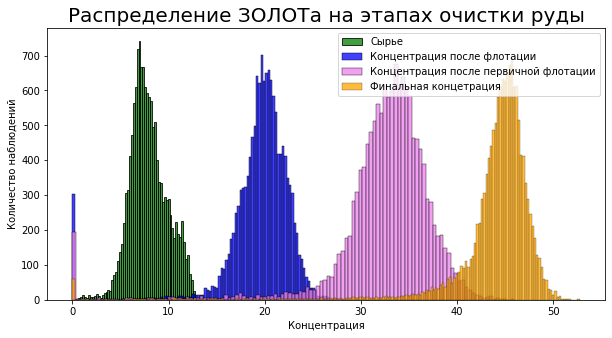

In [ ]:
plt.figure(figsize=[10, 5])
plt.title('Распределение ЗОЛОТа на этапах очистки руды', fontsize=20)
sns.histplot(gold_recovery_train[f'rougher.input.feed_au'], color='green', label='Сырье')
sns.histplot(gold_recovery_train[f'rougher.output.concentrate_au'], color='blue', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'primary_cleaner.output.concentrate_au'], color='violet', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'final.output.concentrate_au'], color='orange', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

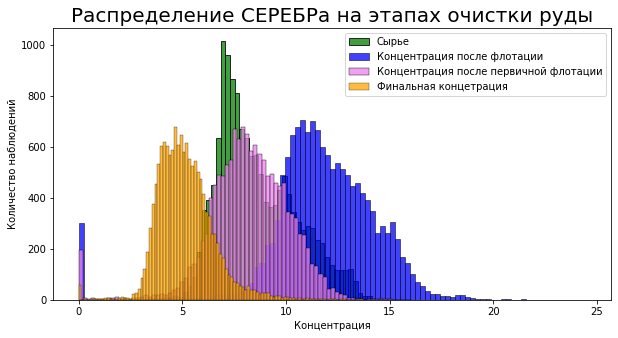

In [ ]:
plt.figure(figsize=[10, 5])
plt.title('Распределение СЕРЕБРа на этапах очистки руды', fontsize=20)
sns.histplot(gold_recovery_train[f'rougher.input.feed_ag'], color='green', label='Сырье')
sns.histplot(gold_recovery_train[f'rougher.output.concentrate_ag'], color='blue', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'primary_cleaner.output.concentrate_ag'], color='violet', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'final.output.concentrate_ag'], color='orange', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

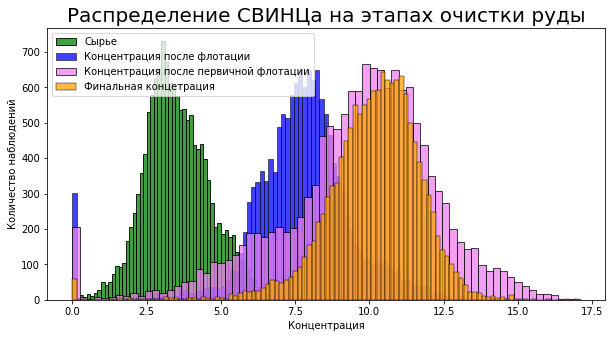

In [ ]:
plt.figure(figsize=[10, 5])
plt.title('Распределение СВИНЦа на этапах очистки руды', fontsize=20)
sns.histplot(gold_recovery_train[f'rougher.input.feed_pb'], color='green', label='Сырье')
sns.histplot(gold_recovery_train[f'rougher.output.concentrate_pb'], color='blue', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'primary_cleaner.output.concentrate_pb'], color='violet', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'final.output.concentrate_pb'], color='orange', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

С каждой чисткой:
- концентрация золота увеличивается,
- концентрация серебра уменьшилась в финале,
- свинец увеличился в сравнении до очистки, но в финальной стадии мало отличился концентрацией после первой очистки.

Нахожу суммарное значение концентраций в трейне и посторим график

In [ ]:
#сумма концентрации сырья
gold_recovery_train['sum_rougher_input_feed'] = gold_recovery_train[['rougher.input.feed_pb',
                                              'rougher.input.feed_ag',
                                              'rougher.input.feed_sol',
                                              'rougher.input.feed_au']].sum(axis=1)

#сумма концентрации после первичной флотации
gold_recovery_train['sum_primary_output_concentrate'] = gold_recovery_train[['primary_cleaner.output.concentrate_pb',
                                                      'primary_cleaner.output.concentrate_ag',
                                                      'primary_cleaner.output.concentrate_sol',
                                                      'primary_cleaner.output.concentrate_au']].sum(axis=1)

#сумма концентрации после флотации
gold_recovery_train['sum_rougher_output_concentrate'] = gold_recovery_train[['rougher.output.concentrate_pb',
                                                      'rougher.output.concentrate_ag',
                                                      'rougher.output.concentrate_sol',
                                                      'rougher.output.concentrate_au']].sum(axis=1)

#сумма концентрации финальная
gold_recovery_train['sum_final_output'] = gold_recovery_train[['final.output.concentrate_pb',
                                        'final.output.concentrate_ag',
                                        'final.output.concentrate_sol',
                                        'final.output.concentrate_au']].sum(axis=1)

display(gold_recovery_train.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,72.640924,66.42495,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,72.543485,67.01271,63.957723


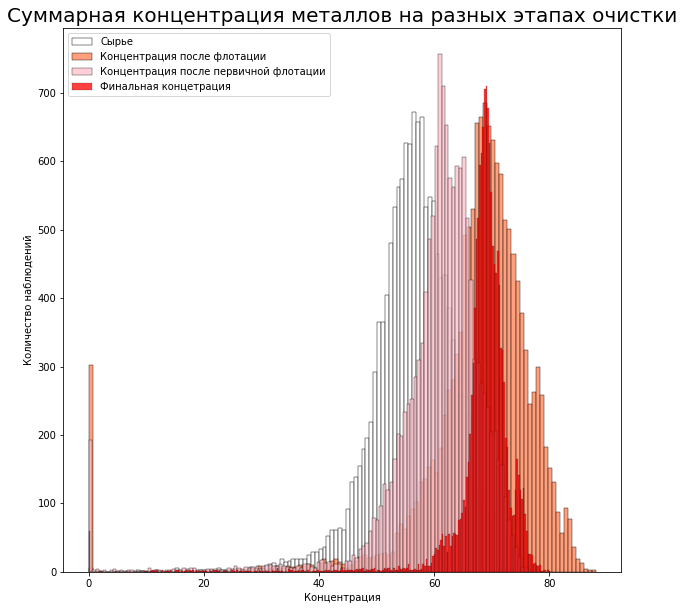

In [ ]:
plt.figure(figsize=[10, 10])
plt.title('Суммарная концентрация металлов на разных этапах очистки', fontsize=20)
sns.histplot(gold_recovery_train[f'sum_rougher_input_feed'], color='white', label='Сырье')
sns.histplot(gold_recovery_train[f'sum_rougher_output_concentrate'], color='coral', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'sum_primary_output_concentrate'], color='pink', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'sum_final_output'], color='red', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

*Построила доп.график -  интересно было понять сколько вбросов перед обработкой и до. Вышло совсем мало.

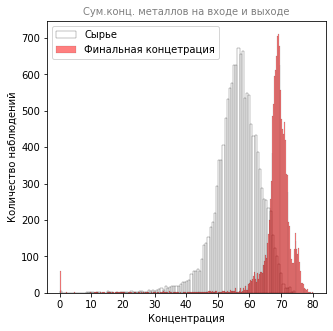

In [ ]:
plt.figure(figsize=[5, 5])
plt.title('Сум.конц. металлов на входе и выходе', fontsize=10, alpha=0.5)
sns.histplot(gold_recovery_train[f'sum_rougher_input_feed'], color='white', label='Сырье', alpha=0.5)
sns.histplot(gold_recovery_train[f'sum_final_output'], color='red', label='Финальная концетрация', alpha=0.5)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

In [ ]:
for col in ['sum_rougher_input_feed', 'sum_rougher_output_concentrate', 'sum_primary_output_concentrate', 'sum_final_output']:
     gold_recovery_train = gold_recovery_train[gold_recovery_train[col]>0]

display(gold_recovery_train.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,72.640924,66.42495,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,72.543485,67.01271,63.957723


Считаю суммарную концентрацию для фулл и удаляю значения меньше `0`

In [ ]:
#сумма концентрации сырья
gold_recovery_full_new['sum_rougher_input_feed'] = gold_recovery_full_new[['rougher.input.feed_pb',
                                              'rougher.input.feed_ag',
                                              'rougher.input.feed_sol',
                                              'rougher.input.feed_au']].sum(axis=1)

#сумма концентрации после первичной флотации
gold_recovery_full_new['sum_primary_output_concentrate'] = gold_recovery_full_new[['primary_cleaner.output.concentrate_pb',
                                                      'primary_cleaner.output.concentrate_ag',
                                                      'primary_cleaner.output.concentrate_sol',
                                                      'primary_cleaner.output.concentrate_au']].sum(axis=1)

#сумма концентрации после флотации
gold_recovery_full_new['sum_rougher_output_concentrate'] = gold_recovery_full_new[['rougher.output.concentrate_pb',
                                                      'rougher.output.concentrate_ag',
                                                      'rougher.output.concentrate_sol',
                                                      'rougher.output.concentrate_au']].sum(axis=1)

#сумма концентрации финальная
gold_recovery_full_new['sum_final_output'] = gold_recovery_full_new[['final.output.concentrate_pb',
                                        'final.output.concentrate_ag',
                                        'final.output.concentrate_sol',
                                        'final.output.concentrate_au']].sum(axis=1)

display(gold_recovery_full_new.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,72.640924,66.42495,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,72.543485,67.01271,63.957723


In [ ]:
for col in ['sum_rougher_input_feed', 'sum_rougher_output_concentrate', 'sum_primary_output_concentrate', 'sum_final_output']:
     gold_recovery_full_new = gold_recovery_full_new[gold_recovery_full_new[col]>0]

display(gold_recovery_full_new.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,72.640924,66.42495,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,72.543485,67.01271,63.957723


Добавляю в тест данные из фулл, чтобы в итоге проверка модели была корректной

In [ ]:
gold_recovery_test_new = gold_recovery_test_new.merge(gold_recovery_full_new[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'inner', on= 'date')
display(gold_recovery_test_new.head(2))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432


Для трейна делаю такие же индексы как у фулл, по дате

In [ ]:
gold_recovery_train = gold_recovery_train.set_index('date')
gold_recovery_full_new = gold_recovery_full_new.set_index('date')
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train.index.isin(gold_recovery_full_new.index)]

print(gold_recovery_train.shape)

(13725, 90)


Сравниваю распределения размеров гранул сырья на обучающей и тестовой выборках.
Используем график плотности.

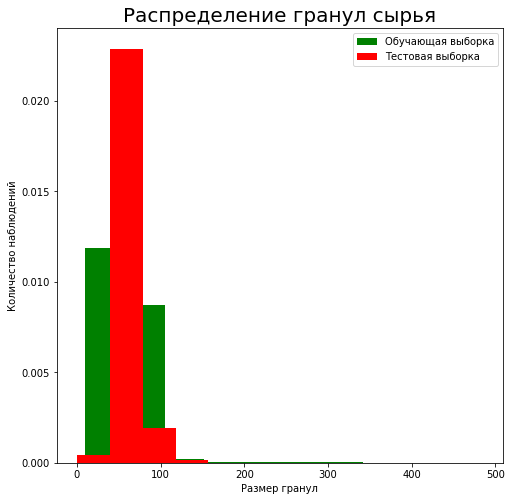

In [ ]:
plt.figure(figsize=[8, 8])
plt.title('Распределение гранул сырья', fontsize=20)
plt.hist(gold_recovery_train[f'rougher.input.feed_size'], color='green', label='Обучающая выборка', density=True)
plt.hist(gold_recovery_test_new[f'rougher.input.feed_size'], color='red', label='Тестовая выборка', density=True)
plt.xlabel('Размер гранул')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

## Модель

Удаляю характеристики, котоыре  получают после завершения тех.процессов из трен.выборки -  нужны данные ДО.

Смотрю какие колонки из теста нужно оставить в трейне

In [ ]:
features_train_col = list(gold_recovery_test_new.columns)[1:]
print(features_train_col)

['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_leve

Оставляю в трейне  только стобцы из теста + целевые

In [ ]:

gold_recovery_train_clear = gold_recovery_train[['primary_cleaner.input.sulfate',
                                                 'primary_cleaner.input.depressant',
                                                 'primary_cleaner.input.feed_size',
                                                 'primary_cleaner.input.xanthate',
                                                 'primary_cleaner.state.floatbank8_a_air',
                                                 'primary_cleaner.state.floatbank8_a_level',
                                                 'primary_cleaner.state.floatbank8_b_air',
                                                 'primary_cleaner.state.floatbank8_b_level',
                                                 'primary_cleaner.state.floatbank8_c_air',
                                                 'primary_cleaner.state.floatbank8_c_level',
                                                 'primary_cleaner.state.floatbank8_d_air',
                                                 'primary_cleaner.state.floatbank8_d_level',
                                                 'rougher.input.feed_ag',
                                                 'rougher.input.feed_pb',
                                                 'rougher.input.feed_rate',
                                                 'rougher.input.feed_size',
                                                 'rougher.input.feed_sol',
                                                 'rougher.input.feed_au',
                                                 'rougher.input.floatbank10_sulfate',
                                                 'rougher.input.floatbank10_xanthate',
                                                 'rougher.input.floatbank11_sulfate',
                                                 'rougher.input.floatbank11_xanthate',
                                                 'rougher.state.floatbank10_a_air',
                                                 'rougher.state.floatbank10_a_level',
                                                 'rougher.state.floatbank10_b_air',
                                                 'rougher.state.floatbank10_b_level',
                                                 'rougher.state.floatbank10_c_air',
                                                 'rougher.state.floatbank10_c_level',
                                                 'rougher.state.floatbank10_d_air',
                                                 'rougher.state.floatbank10_d_level',
                                                 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
                                                 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
                                                 'secondary_cleaner.state.floatbank2_a_air',
                                                 'secondary_cleaner.state.floatbank2_a_level',
                                                 'secondary_cleaner.state.floatbank2_b_air',
                                                 'secondary_cleaner.state.floatbank2_b_level',
                                                 'secondary_cleaner.state.floatbank3_a_air',
                                                 'secondary_cleaner.state.floatbank3_a_level',
                                                 'secondary_cleaner.state.floatbank3_b_air',
                                                 'secondary_cleaner.state.floatbank3_b_level',
                                                 'secondary_cleaner.state.floatbank4_a_air',
                                                 'secondary_cleaner.state.floatbank4_a_level',
                                                 'secondary_cleaner.state.floatbank4_b_air',
                                                 'secondary_cleaner.state.floatbank4_b_level',
                                                 'secondary_cleaner.state.floatbank5_a_air',
                                                 'secondary_cleaner.state.floatbank5_a_level',
                                                 'secondary_cleaner.state.floatbank5_b_air',
                                                 'secondary_cleaner.state.floatbank5_b_level',
                                                 'secondary_cleaner.state.floatbank6_a_air',
                                                 'secondary_cleaner.state.floatbank6_a_level',
                                                 'rougher.output.recovery',
                                                 'final.output.recovery']]

display(gold_recovery_train_clear.head(2))
gold_recovery_train_clear.info()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198


<class 'pandas.core.frame.DataFrame'>
Index: 13725 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13725 non-null  float64
 1   primary_cleaner.input.depressant            13725 non-null  float64
 2   primary_cleaner.input.feed_size             13725 non-null  float64
 3   primary_cleaner.input.xanthate              13725 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13725 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13725 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13725 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13725 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13725 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13725 non-nu

In [ ]:
print(gold_recovery_test_new.shape)
print(gold_recovery_train_clear.shape)

(5123, 55)
(13725, 54)


Пишу фукнцию для SMAPE:

In [ ]:
def smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

smape_scorer = make_scorer(smape, greater_is_better = False)


def final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final



Делю трейн на признаки и целевые признаки

In [ ]:
features_train = gold_recovery_train_clear.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_train = gold_recovery_train_clear['rougher.output.recovery']
target_final_train = gold_recovery_train_clear['final.output.recovery']
print(features_train.shape)

(13725, 52)


### Обучение моделей

DecisionTreeRegressor:

In [ ]:
state = RandomState(12345)

min_result_DT = 100
best_param_DT = 0

for depth in range(1, 11):
    model_rougher_DT = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_rougher_DT = cross_val_score(model_rougher_DT, features_train, target_rougher_train, scoring=smape_scorer, cv=5)
    final_smape_rougher_DT = smape_rougher_DT.mean()

    model_final_DT = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_final_DT = cross_val_score(model_final_DT, features_train, target_final_train, scoring=smape_scorer, cv=5)
    final_smape_final_DT = smape_final_DT.mean()
    result_smape_DT = final_smape(final_smape_rougher_DT, final_smape_final_DT)
    if result_smape_DT < min_result_DT:
        min_result_DT = result_smape_DT
        best_param_DT = depth

    print('Итоговое SMAPE для реш.дерева :', min_result_DT*-1)
    print('Лучшие параметры :', best_param_DT)

print('Конец')

Итоговое SMAPE для реш.дерева : 9.31874654967765
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 9.31874654967765
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 9.31874654967765
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 9.31874654967765
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 9.699439655173963
Лучшие параметры : 5
Итоговое SMAPE для реш.дерева : 10.425955967209099
Лучшие параметры : 6
Итоговое SMAPE для реш.дерева : 11.089387484090885
Лучшие параметры : 7
Итоговое SMAPE для реш.дерева : 11.510858291876971
Лучшие параметры : 8
Итоговое SMAPE для реш.дерева : 12.06472152568009
Лучшие параметры : 9
Итоговое SMAPE для реш.дерева : 12.953116643468505
Лучшие параметры : 10
Конец


RandomForestRegressor:

In [ ]:
best_result_RF = 100
best_param_RF = 0

for est in range(1, 100, 25):
    for depth in range(1,11):
        model_rougher_RF = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        smape_rougher_RF = cross_val_score(model_rougher_RF, features_train, target_rougher_train, scoring=smape_scorer, cv=5)
        final_smape_rougher_RF = smape_rougher_RF.mean()

        model_final_RF = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        smape_final_RF = cross_val_score(model_final_RF, features_train, target_final_train, scoring=smape_scorer, cv=5)
        final_smape_final_RF = smape_final_RF.mean()
        result_smape_RF = final_smape(final_smape_rougher_RF, final_smape_final_RF)
        if result_smape_RF < best_result_RF:
            best_result_RF = result_smape_RF
            best_param_RF = [est, depth]


    print('Лучший параметры модели:', best_param_RF)
    print('Итоговое SMAPE для случ.леса :', best_result_RF*-1)

print('Конец')

Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 11.832076682189376
Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 11.832076682189376
Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 11.832076682189376
Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 11.832076682189376
Конец


LinearRegression:

In [ ]:
model_rougher_LR = LinearRegression()
smape_rougher = cross_val_score(model_rougher_LR, features_train, target_rougher_train, scoring=smape_scorer, cv=5)
final_smape_rougher = smape_rougher.mean()

model_final_LR = LinearRegression()
smape_final = cross_val_score(model_final_LR, features_train, target_final_train, scoring=smape_scorer, cv=5)
final_smape_final = smape_final.mean()

result_smape_LR = final_smape(final_smape_rougher, final_smape_final)

print('Итоговое SMAPE для лог.регрессии :', result_smape_LR*-1)

Итоговое SMAPE для лог.регрессии : 10.029323387636326


Делю тест на признаки и целевые признаки

In [ ]:
features_test = gold_recovery_test_new.drop(['rougher.output.recovery','final.output.recovery', 'date'], axis=1)
target_rougher_test = gold_recovery_test_new['rougher.output.recovery']
target_final_test = gold_recovery_test_new['final.output.recovery']
print(features_test.shape)

(5123, 52)


Выбираю  лучшую модель и обучаю ее на треёне + проверяю на тесте предсказания + считаю sMAPE:

In [ ]:
model_test_rougher = DecisionTreeRegressor(max_depth=1, random_state=state)
model_test_rougher.fit(features_train, target_rougher_train)
predicted_rougher = model_test_rougher.predict(features_test)

model_test_final = DecisionTreeRegressor(max_depth=1, random_state=state)
model_test_final.fit(features_train, target_final_train)
predicted_final = model_test_final.predict(features_test)

smape_test_rougher = smape(target_rougher_test, predicted_rougher)
smape_test_final = smape(target_final_test, predicted_final)
final_smape_test = final_smape(smape_test_rougher, smape_test_final)

print(final_smape_test)

7.312617899523937


Проверяю на дамми:

In [ ]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_rougher.fit(features_train, target_rougher_train)
dummy_predicted_rougher = dummy_rougher.predict(features_test)
smape_const_rougher = smape(target_rougher_test, dummy_predicted_rougher)

dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(features_train, target_final_train)
dummy_predicted_final = dummy_final.predict(features_test)
smape_const_final = smape(target_final_test, dummy_predicted_final)

final_smape_const = final_smape(smape_const_rougher, smape_const_final)
print(final_smape_const)

7.778089380065631


## Вывод
1. При обработке концентарция:
- золота увеличивается значительно,
- свинца увеличивается,
- серебро снижается.
2. Лушчшая модель - Решающее дерево.
3. Лучшая модель прошла проверку адекватности и обучение на тесте: симм.отклонение составило 7.312 и 7.778 соответственно. Данные получила после очистки выбросов и учета на трейн столбцов как на тесте.

**Примечания и особенности данных:**
0. Прежде чем проводить аналитику нужно подробно изучить предоставленные данные. Разобраться в них. Иначе результаты могут быть искажены. Без чистки данных у меня выходило симм.отклонение на 25% больше, чем есть на самом деле.
1. В тестовой выборке отсутствовали цел.признаки - добавляла из полной выборки.
2. Оставила в трейн только те признаки, которые есть в тесте + цел.признаки.
3. Дату сделала индексом выборок, а при обучении и проверке удалила ее.
4. Заполнены пропуски данных.